# First time here?
Please see our [demo](ReadMeFirst.ipynb) on how to use the notebooks.


# Timescales of measurement and why they matter

The purpose of this demo is to get you thinking about how the timescale of your measurement technique affects the answer you get.  Every physical process has one or more timescales associated with it.  

For example, an enzyme is synthesized and degraded on the timescale of minutes, performs a single enzymatic reaction on the timescale of microseconds to seconds, and fluctuates on timescales down to picoseconds.  What properties you measure will depend on *how* you perform the measurement, because each experimental technique has its own timescales as well.  

For example, think of a camera.  We think of a photograph as capturing an instant in time, but in reality a camera has a finite shutter-speed: the shutter is open for a period of time, and the image recorded is the sum of the signal that enters the lens during that time.  If motion is much slower than that shutter-speed, then effectively no averaging takes place, and we get a single sharp image.  However, motion faster than that shutter speed blurs the image.  The other relevant time scale is the cycle time: how fast can we record new images?  Varying these two times will have very different effects on the data we measure.





We'll start the demo by importing a few packages we'll need.

In [1]:
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np


Here, we're importing a time series we've previously created.  You can think of this as the true underlying behavior of the system, if we had an infinitely fast camera with an infinitesimal shutter speed.

In [2]:
all_data = np.loadtxt("double_well.asc")
all_histogram,bin_edges = np.histogram(all_data, 235, [-2.35,2.35], density=True)
time = np.arange(len(all_data))

Here's what we get if we simply plot the time series and histogram it.  We can see that there are 2 primary states (centered roughly around -1.1 and 1.1), but that each state has several substates associated with it.

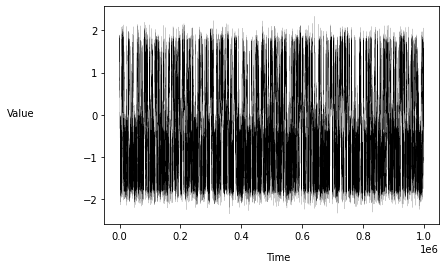

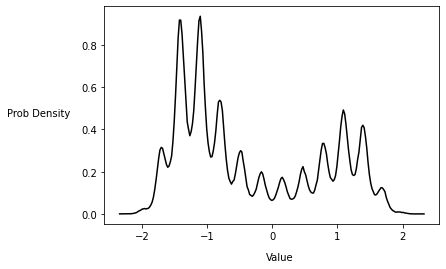

In [3]:
plt.plot(time, all_data, "-k", linewidth=0.1)
plt.figtext(0.5, 0.0, "Time")
plt.figtext(-0.1, 0.5, "Value")
plt.show()

plt.plot(bin_edges[:-1], all_histogram, "-k")
plt.figtext(0.5, 0.0, "Value")
plt.figtext(-0.1, 0.5, "Prob Density")
plt.show()

In [8]:
def downsample_both(downsample_factor):
    reshaped = np.reshape(all_data, (int(len(all_data)/downsample_factor),
                                    downsample_factor))
    time_reshaped = np.reshape(time, (int(len(all_data)/downsample_factor),
                                    downsample_factor))
    downsampled = reshaped[:,0]
    time_downsampled = time_reshaped[:,0]
    down_histogram,bin_edges = np.histogram(downsampled, 235, [-2.35,2.35], density=True)
    
    plt.plot(time_downsampled, downsampled, "-r")
    plt.figtext(0.5, 0.0, "Time")
    plt.figtext(-0.1, 0.5, "Value")
    plt.ylim(-2.2, 2.2)
    plt.show()
    
    plt.plot(bin_edges[:-1], down_histogram, "-k")
    plt.figtext(0.5, 0.0, "Value")
    plt.figtext(-0.1, 0.5, "Prob Density")
    plt.show()
    

In [9]:
downscale_options = (1,100,1000,2500, 5000,10000, 50000, 100000)
interact(downsample_both, downsample_factor=widgets.Dropdown(options=downscale_options, description="Downsample Factor" ) );

interactive(children=(Dropdown(description='Downsample Factor', options=(1, 100, 1000, 2500, 5000, 10000, 5000…

We see that as we reduce the number of data points, the time series gets coarser and the histogram gets noisier (so we can't see the finer features). However, the width of the distribution stays more or less the same; any changes are just the result of it being noisier.

In [12]:
def average_both(average_factor):
    reshaped = np.reshape(all_data, (int(len(all_data)/average_factor),
                                    average_factor))
    time_reshaped = np.reshape(time, (int(len(all_data)/average_factor),
                                    average_factor))
    averaged = np.add.reduce(reshaped, 1) / average_factor
    ave_histogram,bin_edges = np.histogram(averaged, 235, [-2.35,2.35], density=True)
    time_downsampled = time_reshaped[:,0]
    plt.plot(time_downsampled, averaged, "-r")
    plt.ylim(-2.2, 2.2)
    plt.figtext(0.5, 0.0, "Time")
    plt.figtext(-0.1, 0.5, "Value")
    plt.show()
    
    plt.plot(bin_edges[:-1], all_histogram, "-k", bin_edges[:-1], ave_histogram, "-r")
    plt.figtext(0.5, 0.0, "Value")
    plt.figtext(-0.1, 0.5, "Prob Density")
    plt.show()

In [13]:
average_options = (1,10, 100, 1000, 10000, 100000)
interact(average_both, average_factor=widgets.Dropdown(options=average_options, description="Averaging Time" ) );


interactive(children=(Dropdown(description='Averaging Time', options=(1, 10, 100, 1000, 10000, 100000), value=…

When you move the averaging time from 1 to 10, very little changes in either the time series or the histogram.  That tells us that the timescale to move between the substates is probably less than or comparable to 10.  

When the averaging time goes to 100, the variance of the time series is noticeably smaller, and the substructure within the two main states largely disappears.  This means that during 100 time counts, the system is hopping repeatedly from one substate to another, so that each "measurement" records an average of one or more substates.  Also, the peaks have gotten a little narrower, for the same reason.

Now look at an averaging time of 1000.  The variance in the time series is much smaller, and the histogram peaks have gotten significantly narrower and have moved toward the middle.  This is because now each "measurement" likely has contributions from both major states.  The histograms have also started to get noisy, because we have a lot less data.

Finally, look at averaging times of 10000 and 100000.  This time is longer than the time to exchange between the two major states, and  ** __as a result we no longer see 2 states at all__ **. 